In [1]:
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=4,
    random_state=42
)

<Axes: >

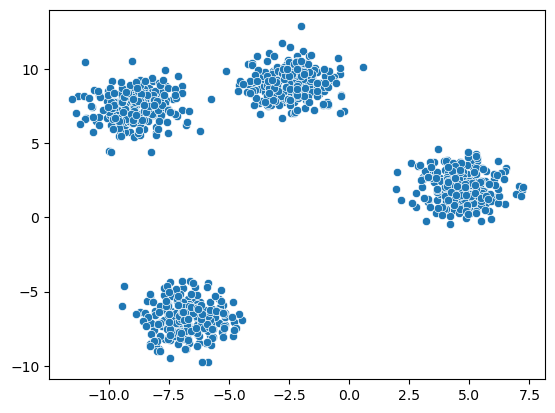

In [7]:
# Visualize
sns.scatterplot(x=X[:, 0], y=X[:, 1])

In [9]:
# K-Means Clustering
from sklearn.cluster import KMeans

In [11]:
K = 4

kmeans = KMeans(
    n_clusters=K,
    random_state=42
)

In [12]:
labels = kmeans.fit_predict(X)
# label = cluster number

<Axes: >

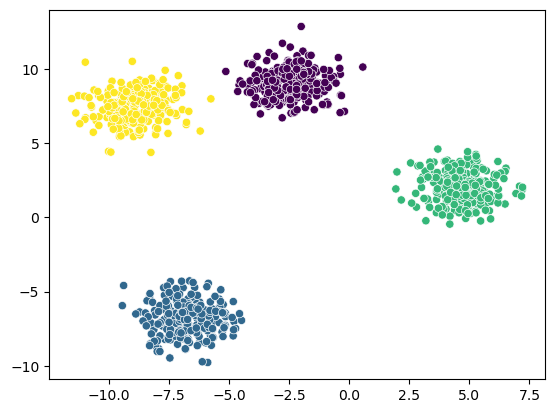

In [15]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], c=labels)

### Choose our K value - elbow; silhouette score

In [18]:
# Elbow Method

wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    

<Axes: >

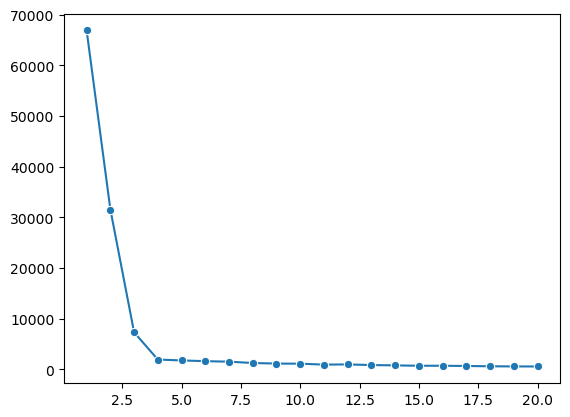

In [19]:
sns.lineplot(x=range(1, 21), y=wcss, marker='o')

In [20]:
# Kneed Module

!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
knee = KneeLocator(range(1, 21), wcss, curve="convex", direction="decreasing")

In [26]:
print("optimal K = ", knee.elbow)

optimal K =  4


### Silhouette Score

In [27]:
from sklearn.metrics import silhouette_score

In [29]:
ss = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)

    ss.append(score)

<Axes: >

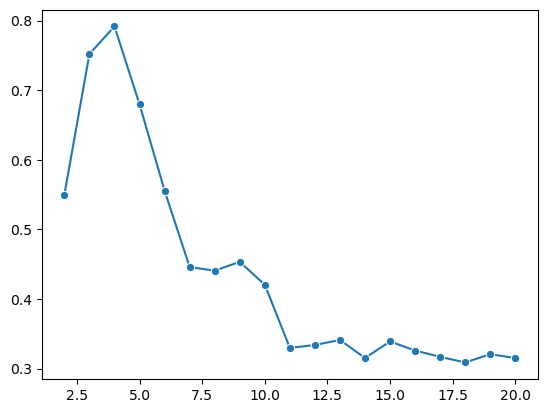

In [31]:
# plot - K & ss

sns.lineplot(x=range(2, 21), y=ss, marker='o')